In [132]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

from hol.count_wpm import CountWPM
from hol.anchored_count_wpm import AnchoredCountWPM

year1 = 1750
year2 = 1920

wpm0 = CountWPM(year1, year2)
wpm1 = AnchoredCountWPM(year1, year2)

### Raw WPM series

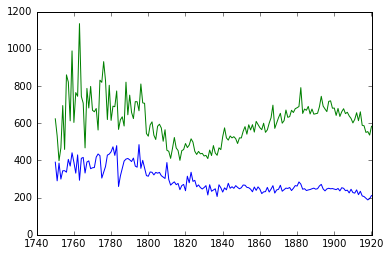

In [2]:
series = wpm0.series('art')
plt.plot(*zip(*series.items()))

series = wpm1.series('art')
plt.plot(*zip(*series.items()))

### Smoothed WPM series

-0.10404915293 0.175634775843


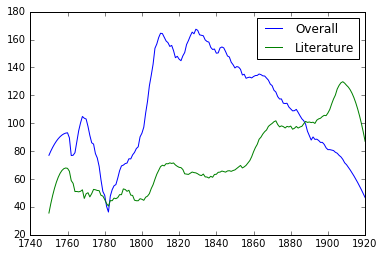

In [127]:
from collections import OrderedDict
from scipy.stats import pearsonr

def plot_token(token):

    s1 = wpm0.series_smooth(token)
    plt.plot(*zip(*s1.items()), label='Overall')

    s2 = wpm1.series_smooth(token)
    plt.plot(*zip(*s2.items()), label='Literature')
    
    plt.legend(loc='upper right')
    
    s1_resized = OrderedDict([
        (year, s1[year])
        for year in s2.keys()
    ])
    
    vals1 = list(s1_resized.values())
    vals2 = list(s2.values())
    
    corr, p = pearsonr(vals1, vals2)
    print(corr, p)
    
plot_token('jesus')

### Distinctive words, 20-year buckets

In [111]:
from hol.models import AnchoredCount

buckets = [
    (1740, 1760),
    (1760, 1780),
    (1780, 1800),
    (1820, 1840),
    (1840, 1860),
    (1860, 1880),
    (1880, 1900),
    (1900, 1920),
]

tokens = set()

for y1, y2 in buckets:
    mdws = AnchoredCount.mdw(y1, y2)
    tokens.update(list(mdws.keys())[:500])

### Pearson correlation - overall vs. "literature" pages

In [124]:
from tabulate import tabulate

corrs = OrderedDict()
for token in tokens:
    
    s1 = wpm0.series_smooth(token)
    s2 = wpm1.series_smooth(token)
    
    s1_resized = OrderedDict([
        (year, s1[year])
        for year in s2.keys()
    ])
    
    vals1 = list(s1_resized.values())
    vals2 = list(s2.values())
    
    corr, p = pearsonr(vals1, vals2)
    
    if p < 0.05:
        corrs[token] = (corr, p)

corrs = OrderedDict(sorted(
    corrs.items(),
    key=lambda x: x[1][0],
))

table = []
for t, (c, p) in corrs.items():
    table.append([t, c, p])
    
print(tabulate(table, headers=['token', 'pearson', 'p-value']))

token            pearson       p-value
-------------  ---------  ------------
improvements   -0.750901  2.87664e-32
liable         -0.704088  6.47944e-27
improved       -0.660321  8.82929e-23
gross          -0.599458  4.62001e-18
specimen       -0.599006  4.9658e-18
court          -0.566879  6.34837e-16
applied        -0.549151  7.42157e-15
estate         -0.546032  1.12704e-14
branches       -0.469683  9.13337e-11
paid           -0.463758  1.68034e-10
blood          -0.420364  1.03989e-08
models         -0.414931  1.84622e-08
improvement    -0.396954  7.64602e-08
application    -0.357566  1.57736e-06
london         -0.348705  2.9537e-06
defendant      -0.313029  5.57167e-05
seems          -0.278348  0.00022754
warrant        -0.25369   0.000843564
trial          -0.249755  0.000986385
employment     -0.234311  0.00203829
academy        -0.226175  0.00293396
at             -0.213088  0.00513785
branch         -0.210666  0.0056798
under          -0.207098  0.00657137
jurisdiction   -0.2

### Significant correlations - overall vs. "literature" WPMs

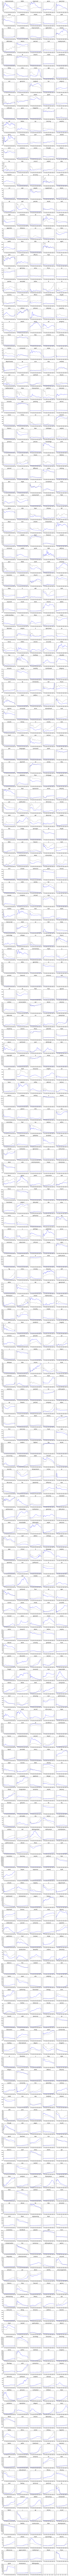

In [148]:
import math

def small_multiples(tokens, cols=5):
    
    # Calculate the row count and figure size.
    rows = math.ceil(len(tokens) / cols)
    figsize = (cols*2, rows*2)
    
    # Make the figure + axes.
    fig, axarr = plt.subplots(rows, cols, figsize=figsize, sharey='row')
    fig.tight_layout(pad=0, h_pad=2, w_pad=0.1)
    
    for i, token in enumerate(tokens):
        
        ax = axarr[math.floor(i/cols)][i%cols]
        ax.set_title(token)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
        ax.tick_params(labelsize=8)
        ax.set_xlim(year1, year2)
        # ax.set_ylim(0, topns.depth)
        
        s1 = wpm0.series_smooth(token)
        ax.plot(*zip(*s1.items()), label='Overall', color='gray')

        s2 = wpm1.series_smooth(token)
        ax.plot(*zip(*s2.items()), label='Literature')
        

small_multiples(list(corrs.keys())[:1000])